In [417]:
# Ziel der Aufgabe:
# Ein ML-Modell entwickeln, das Früchte (Apfel, Banane, Traube) anhand ihrer Eigenschaften klassifiziert.
# Autorin: Amina Nedzibovic
# Datum: 7. Juli 2025

In [418]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [419]:
# Datenexploration
# Hier untersuchen wir zunächst die Rohdaten und bereinigen sie anschließend.

In [420]:
# Excel einlesen und ausgeben
df = pd.read_excel("fruit_data.xlsx")
print(df)

     Unnamed: 0 fruit_type         color    size     weight
0             0      grape        Yellow    Tiny   8.303385
1             1      apple          Pink  Largee  80.976370
2             2     banana   Pale Yellow   Large  74.615192
3             3      grape           Red    Tiny   6.924070
4             4     banana  Creamy White  Largee  82.002542
..          ...        ...           ...     ...        ...
195         195      grape        Purple   Small   9.774546
196         196     banana   Pale Yellow   Large  39.012962
197         197      grape           Red   Small   7.409021
198         198      grape           Red  Medium   4.651554
199         199      grape           Red  Medium   5.937051

[200 rows x 5 columns]


In [421]:
# Zeilen anschauen, und unnötige Spalten löschen
df.head()
# Unnamed ist eine unnötige Spalte und kann gelöscht werden
df = df.drop(columns=["Unnamed: 0"])
df.head()

,fruit_type,color,size,weight
0,grape,Yellow,Tiny,8.303385
1,apple,Pink,Largee,80.976370
2,banana,Pale Yellow,Large,74.615192
3,grape,Red,Tiny,6.924070
4,banana,Creamy White,Largee,82.002542


In [422]:
# gucken, welche verschiedenen einträge es gibt, um nach tippfehlern gucken zu können
df
print(df["fruit_type"].unique())
print(df["color"].unique())
print(df["size"].unique())
# yellow1 und Largee sind höchstwahrscheinlich Tippfehler

['grape' 'apple' 'banana']
['Yellow' 'Pink' 'Pale Yellow' 'Red' 'Creamy White' 'Green' 'Yellow1'
 'Purple' 'Black']
['Tiny' 'Largee' 'Large' 'Small' 'Medium']


In [423]:
df.isnull().sum()
# Keine missing values, gut.

fruit_type    0
color         0
size          0
weight        0
dtype: int64

In [424]:
# Creamy white betrachten, obs wichtig ist
df[df["color"] == "Creamy White"]

,fruit_type,color,size,weight
4,banana,Creamy White,Largee,82.002542
10,banana,Creamy White,Largee,77.121200
36,banana,Creamy White,Medium,78.374787
51,banana,Creamy White,Small,32.326450
57,banana,Creamy White,Small,116.380543
60,banana,Creamy White,Largee,101.649728
71,banana,Creamy White,Medium,89.719116
86,banana,Creamy White,Small,45.131676
88,banana,Creamy White,Small,32.326450
90,banana,Creamy White,Medium,79.903235


In [425]:
# Mit yellow vergleichen, ob Unterschied 
df[df["color"] == "Yellow"]

,fruit_type,color,size,weight
0,grape,Yellow,Tiny,8.303385
13,apple,Yellow,Largee,130.721867
21,apple,Yellow,Small,130.721867
30,banana,Yellow,Medium,82.002542
33,apple,Yellow,Medium,250.000000
37,grape,Yellow,Tiny,1.000000
46,banana,Yellow,Medium,116.380543
54,grape,Yellow,Medium,6.452330
56,apple,Yellow,Largee,68.720254
63,grape,Yellow,Medium,4.309718


In [426]:
# Die Farben vergleichen 
df[df["color"].isin(["Creamy White", "Yellow"])].groupby(["color", "size"])["weight"].describe()

count       mean        std        min        25%  \
color        size                                                        
Creamy White Largee    3.0  86.924490  12.983888  77.121200  79.561871   
             Medium    5.0  76.523382  11.739667  57.498575  77.121200   
             Small     9.0  67.242012  35.237675  32.326450  32.326450   
Yellow       Large    10.0  94.123614  20.580744  57.227698  81.925824   
             Largee    6.0  87.808079  26.618277  56.056490  70.820491   
             Medium   13.0  62.970022  66.246616   4.309718  25.038323   
             Small     8.0  45.654551  55.427927   5.371310   5.709592   
             Tiny      6.0   6.717314   3.203948   1.000000   5.880791   

                           50%         75%         max  
color        size                                       
Creamy White Largee  82.002542   91.826135  101.649728  
             Medium  78.374787   79.903235   89.719116  
             Small   57.498575   94.432633  116.380543  
Yellow       Large   95.373953  106.271931  123.068395  
             Largee  84.850067   99.382029  130.721867  
             Medium  54.831809   82.002542  250.000000  
             Small    6.895780   99.229548  130.721867  
             Tiny     7.336933    9.168018    9.456228

In [427]:
# einheitlicher machen
df["size"] = df["size"].str.strip().str.lower()  
df["color"] = df["color"].str.strip().str.lower()
df["fruit_type"] = df["fruit_type"].str.strip().str.lower()
df

df["size"] = df["size"].replace({
    "largee": "large"
})

print(df["color"].value_counts())

# Nicht wirklich ein unterschied bei Pale Yellow und yellow und bei creamy white und yellow auch nicht
# Die hellere Farbe hat weder Korrelation noch einen Zusammenhang zu dem Gewicht, deshalb kann man zusammenfassen alles zu gelb
df["color"] = df["color"].replace({
    "yellow1": "yellow",
    "creamy white": "yellow",
    "pale yellow": "yellow",
})

color
green           58
yellow          43
red             31
creamy white    17
pink            17
purple          13
black           10
pale yellow      9
yellow1          2
Name: count, dtype: int64


In [428]:
# Ausreißer werden angeschaut mithilfe von Boxplots 

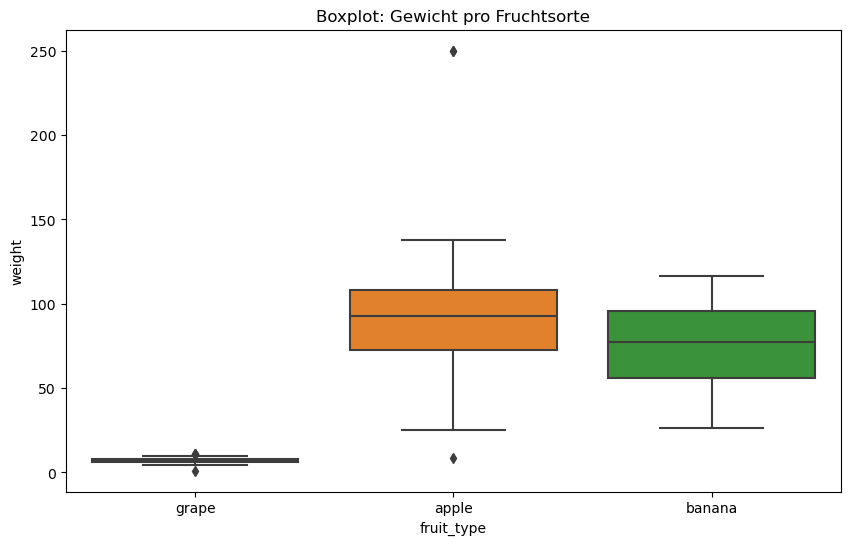

In [429]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="fruit_type", y="weight")
plt.title("Boxplot: Gewicht pro Fruchtsorte")
plt.show()

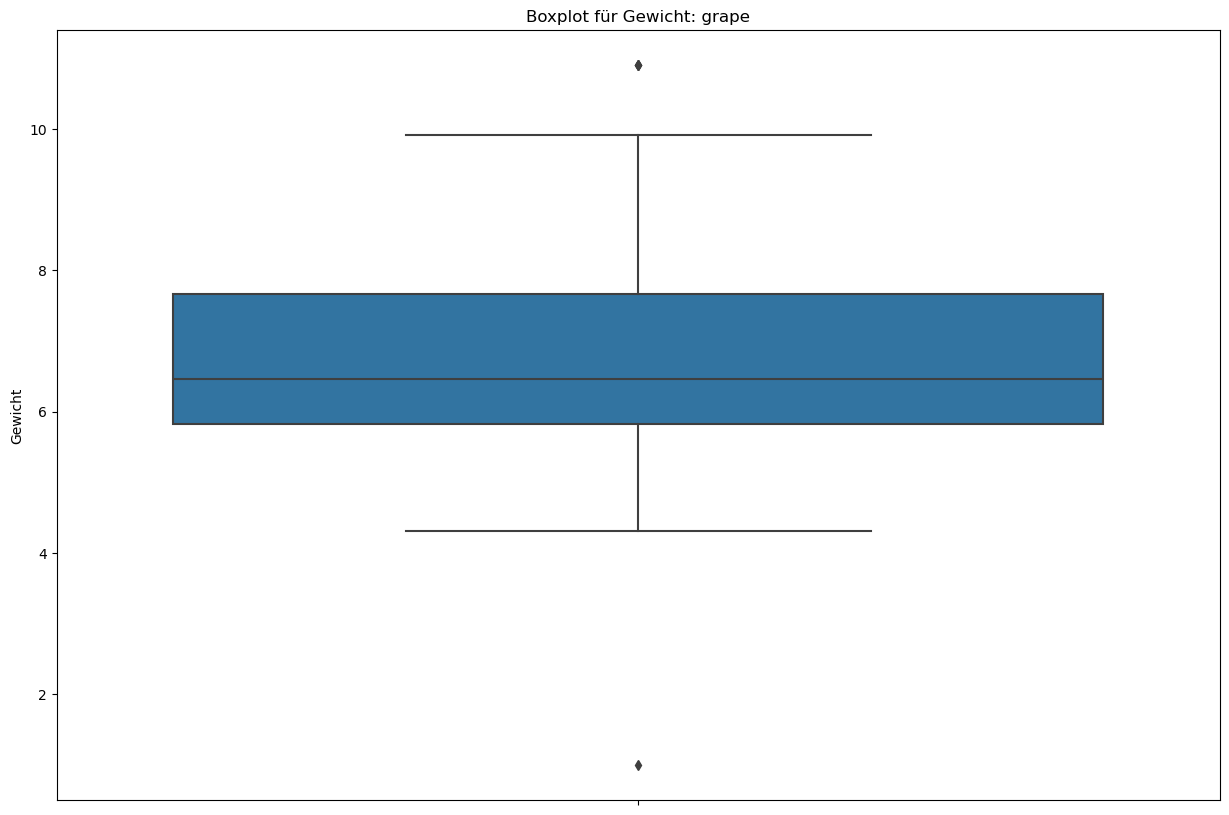

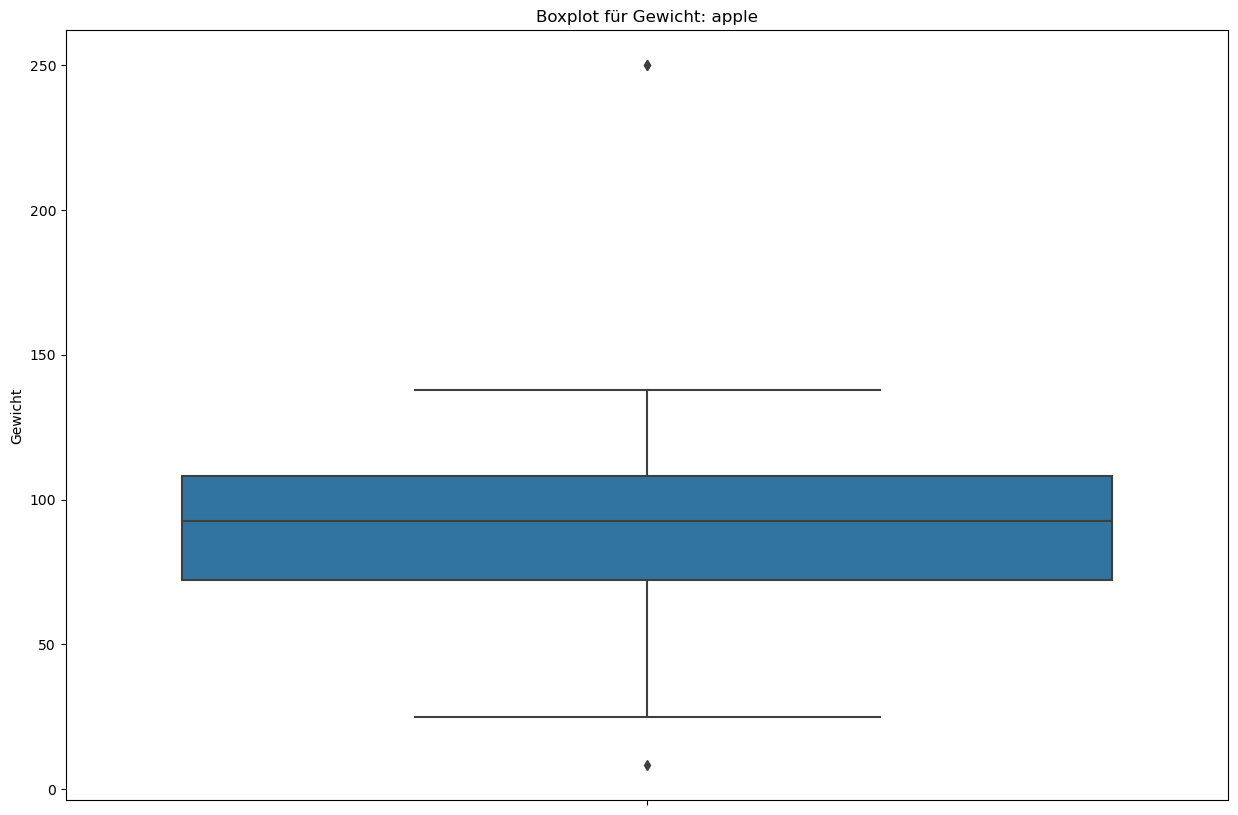

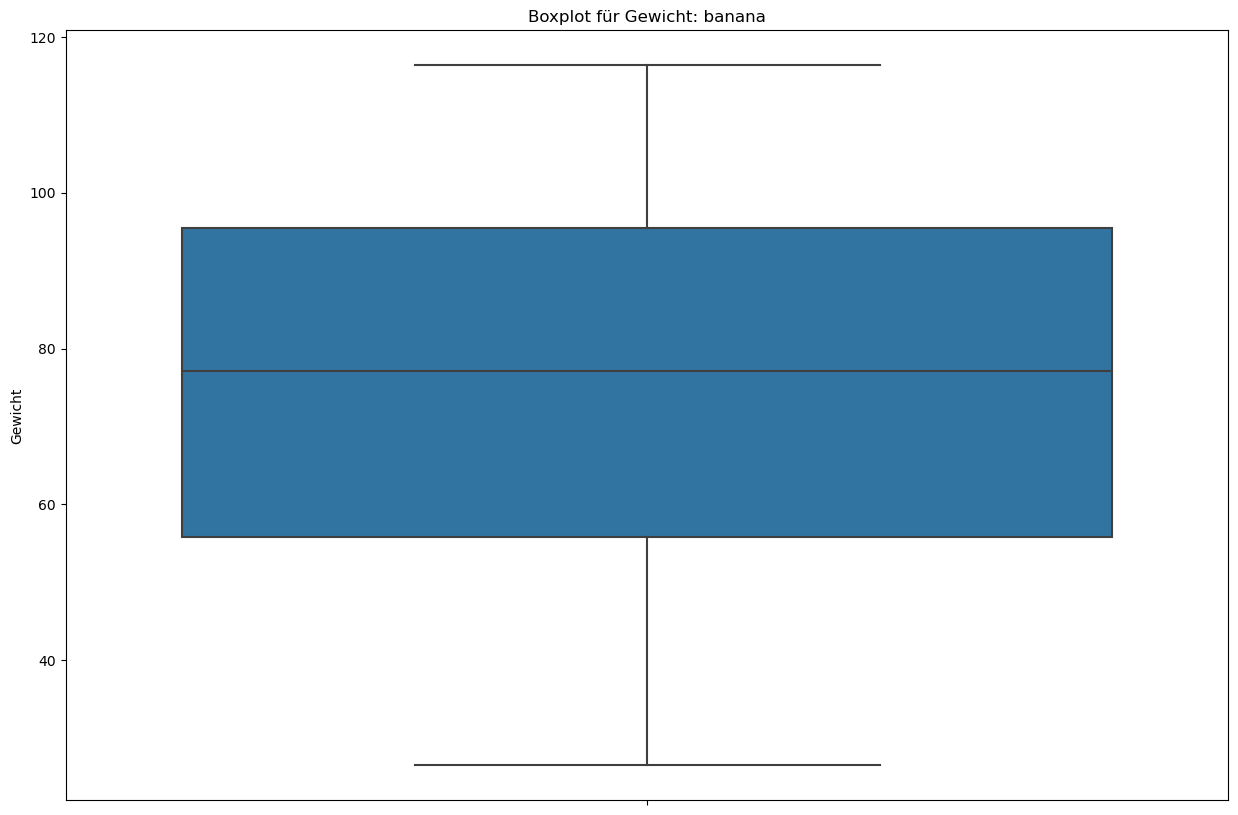

In [430]:
# Boxplots für die einzelnen früchte 
fruit_types = df["fruit_type"].unique()

for fruit in fruit_types:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[df["fruit_type"] == fruit], y="weight")
    plt.title(f"Boxplot für Gewicht: {fruit}")
    plt.ylabel("Gewicht")
    plt.show()

In [431]:
# Zeige potenzielle Ausreißer in der Spalte 'weight' für jede Fruchtsorte (basierend auf IQR-Methode).
# Diese Ausreißer sollten einzeln überprüft werden, um zu entscheiden, ob sie realistisch oder fehlerhaft sind.
def find_outliers_iqr(group, column="weight"):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group[column] < lower_bound) | (group[column] > upper_bound)]

# Wende es auf jede Fruchtsorte an
outliers_df = df.groupby("fruit_type").apply(find_outliers_iqr).reset_index(drop=True)
print(outliers_df)

  fruit_type   color    size      weight
0      apple   green   small  250.000000
1      apple  yellow  medium  250.000000
2      apple   green  medium    8.300753
3      grape  purple    tiny   10.902198
4      grape  yellow    tiny    1.000000
5      grape   green   small   10.902198
6      grape   green  medium   10.902198


In [432]:
# 250gr für einen Apfel ist zwar viel aber möglich und zu Large ändern
# 8gr für einen Apfel ist jedoch extremst wenig == Winsorisieren und zu small ändern
# bei traube size names ändern, weil alles über 10 ist Large 
# Lösung, da ich nicht weiß, ob andere sizes auch falsch sind== Gewichtskategorien erstellen
# für apfel: https://hortica.de/wie-viel-gramm-wiegt-ein-apfel/
# für banane: https://praxistipps.focus.de/wie-viel-wiegt-eine-banane-infos-zum-gewicht_173612
# für traube: aus verschiedenen quellen mir eine kategorie abgeleitet 

def correct_size_row(row):
    fruit = row["fruit_type"]
    weight = row["weight"]
    
    if fruit == "apple":
        if weight <= 90:
            return "small"
        elif weight < 190:
            return "medium"
        elif weight <= 250:
            return "large"
        else:
            return "Unknown"  
    
    elif fruit == "banana":
        if weight < 120:
            return "small"
        elif weight < 140:
            return "medium"
        else:
            return "large"
    
    elif fruit == "grape":
        if weight < 2:
            return "small"
        elif weight < 5:
            return "medium"
        elif weight < 11:
            return "large"
        else:
            return "Unknown"
    
    else:
        return "Unknown"

df["size_corrected"] = df.apply(correct_size_row, axis=1)
df["size_corrected"].value_counts()

size_corrected
small     95
large     57
medium    48
Name: count, dtype: int64

In [433]:
df
df = df.drop(columns=['size'])
# alte size column löschen, weil sie viele falsche einträge hatte 

In [434]:
df
df.rename(columns={"size_corrected": "size"}, inplace=True)
df

,fruit_type,color,weight,size
0,grape,yellow,8.303385,large
1,apple,pink,80.976370,small
2,banana,yellow,74.615192,small
3,grape,red,6.924070,large
4,banana,yellow,82.002542,small
...,...,...,...,...
195,grape,purple,9.774546,large
196,banana,yellow,39.012962,small
197,grape,red,7.409021,large
198,grape,red,4.651554,medium


In [435]:
print(df.columns)

Index(['fruit_type', 'color', 'weight', 'size'], dtype='object')


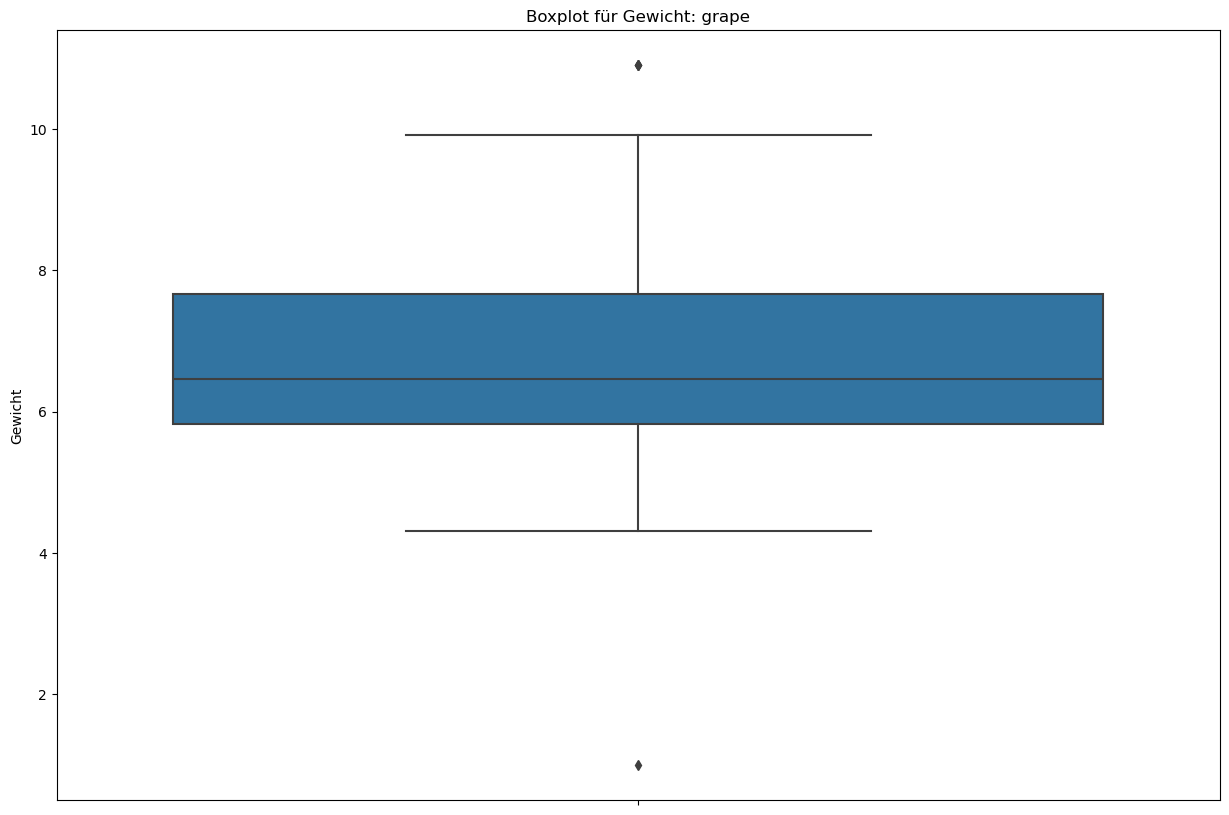

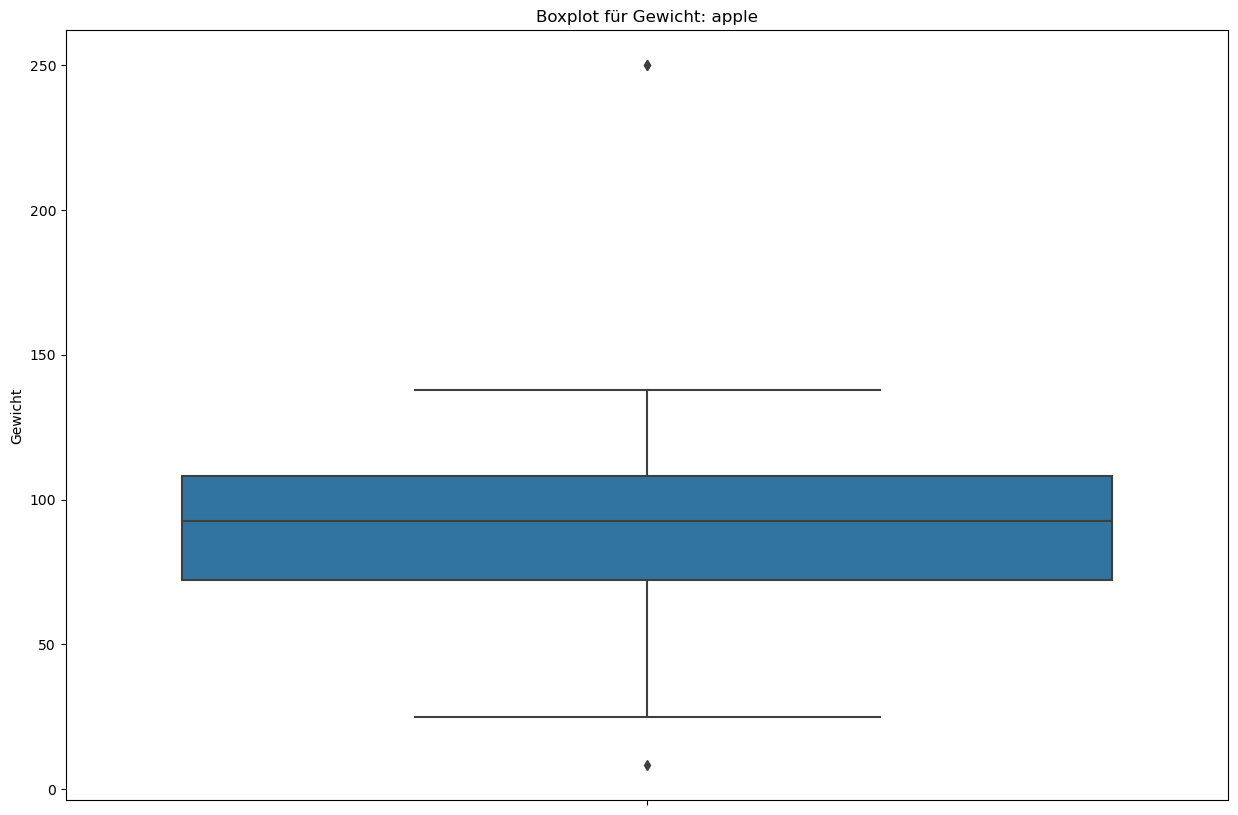

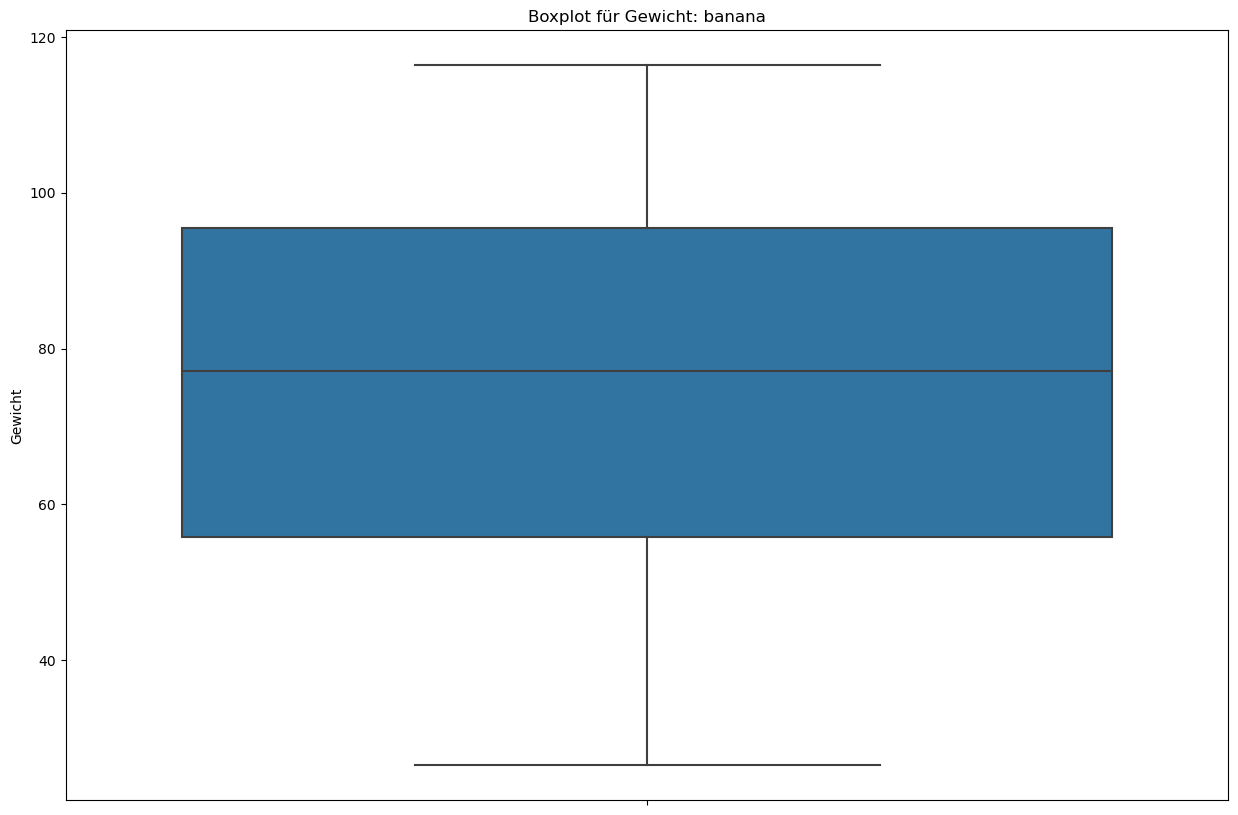

In [436]:
# für jede Fruchtsorte einen separaten Boxplot erstellen, um die Verteilung des Gewichts zu visualisieren.
fruit_types = df["fruit_type"].unique()

for fruit in fruit_types:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[df["fruit_type"] == fruit], y="weight")
    plt.title(f"Boxplot für Gewicht: {fruit}")
    plt.ylabel("Gewicht")
    plt.show()

In [437]:
print(df["fruit_type"].value_counts())

fruit_type
apple     70
grape     66
banana    64
Name: count, dtype: int64


In [438]:
# kategoriale Merkmale ('fruit_type', 'size', 'color') in numerische One-Hot-Encoded-Spalten umwandeln
# notwendig, damit maschinelle Lernmodelle mit den kategorialen Informationen arbeiten kann
fruit_type_oh = pd.get_dummies(df["fruit_type"], dtype=int)
size_oh = pd.get_dummies(df["size"], prefix="size", dtype=int)
color_oh = pd.get_dummies(df["color"], prefix="color", dtype=int)
df = df.drop(columns=["fruit_type", "size", "color"])
# Zusammenfügen
df = pd.concat([df, fruit_type_oh, size_oh, color_oh], axis=1)

print(df)

        weight  apple  banana  grape  size_large  size_medium  size_small  \
0     8.303385      0       0      1           1            0           0   
1    80.976370      1       0      0           0            0           1   
2    74.615192      0       1      0           0            0           1   
3     6.924070      0       0      1           1            0           0   
4    82.002542      0       1      0           0            0           1   
..         ...    ...     ...    ...         ...          ...         ...   
195   9.774546      0       0      1           1            0           0   
196  39.012962      0       1      0           0            0           1   
197   7.409021      0       0      1           1            0           0   
198   4.651554      0       0      1           0            1           0   
199   5.937051      0       0      1           1            0           0   

     color_black  color_green  color_pink  color_purple  color_red  \
0    

In [439]:
# Auswahl trifft den Standardscaler (MinMax geht auch)
# Weight muss normalisiert werden
# import StandardScaler für die Standardisierung numerischer Daten 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

num_cols = ['weight']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# kontrolle mithilfe der ersten paar zeilen
print(df.head())

     weight  apple  banana  grape  size_large  size_medium  size_small  \
0 -1.089371      0       0      1           1            0           0   
1  0.470776      1       0      0           0            0           1   
2  0.334214      0       1      0           0            0           1   
3 -1.118982      0       0      1           1            0           0   
4  0.492806      0       1      0           0            0           1   

   color_black  color_green  color_pink  color_purple  color_red  color_yellow  
0            0            0           0             0          0             1  
1            0            0           1             0          0             0  
2            0            0           0             0          0             1  
3            0            0           0             0          1             0  
4            0            0           0             0          0             1  


In [440]:
# Datensatz aufteilen!

In [441]:
# Erzeuge die Zielvariable (label), indem die One-Hot-Encoded-Spalten ('apple', 'banana', 'grape') ausgewertet werden
# 'idxmax' gibt den Spaltennamen mit dem höchsten Wert (also 1) zurück – das entspricht der tatsächlichen Fruchtklasse
df['label'] = df[['apple', 'banana', 'grape']].idxmax(axis=1)

X = df.drop(columns=['apple', 'banana', 'grape', 'label'])
y = df['label']

In [442]:
# Daten in Trainings- und Testmenge aufteilen
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [443]:
# Fit den Scaler nur auf den Trainingsdaten, um Data Leakage zu vermeiden
# Transformation anwenden 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# zurück in DataFrame-Form für bessere Lesbarkeit
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [444]:
# Dimensionen der Trainings- und Testdaten.
print("Shape von X_train:", X_train.shape)
print("Shape von X_test:", X_test.shape)
print("Shape von y_train:", y_train.shape)
print("Shape von y_test:", y_test.shape)

# Beispiel-Daten anschauen
print("\nErste 5 Zeilen von X_train:")
print(X_train.head())

print("\nErste 5 Labels von y_train:")
print(y_train.head())

Shape von X_train: (160, 10)
Shape von X_test: (40, 10)
Shape von y_train: (160,)
Shape von y_test: (40,)

Erste 5 Zeilen von X_train:
       weight  size_large  size_medium  size_small  color_black  color_green  \
79   1.374410           0            1           0            0            1   
197 -1.108571           1            0           0            0            0   
38  -1.167769           0            1           0            1            0   
24  -1.057788           1            0           0            0            0   
122 -1.089371           1            0           0            0            1   

     color_pink  color_purple  color_red  color_yellow  
79            0             0          0             0  
197           0             0          1             0  
38            0             0          0             0  
24            0             0          1             0  
122           0             0          0             0  

Erste 5 Labels von y_train:
79     apple


In [445]:
print(X_train_scaled.mean())
print(X_train_scaled.std())

weight         -1.804112e-17
size_large      5.551115e-17
size_medium     0.000000e+00
size_small     -1.665335e-17
color_black     5.551115e-18
color_green     2.220446e-17
color_pink     -2.220446e-17
color_purple   -5.551115e-17
color_red       2.220446e-17
color_yellow   -2.220446e-17
dtype: float64
weight          1.00314
size_large      1.00314
size_medium     1.00314
size_small      1.00314
color_black     1.00314
color_green     1.00314
color_pink      1.00314
color_purple    1.00314
color_red       1.00314
color_yellow    1.00314
dtype: float64


In [446]:
# Imports 
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [447]:
df.describe()

,weight,apple,banana,grape,size_large,size_medium,size_small,color_black,color_green,color_pink,color_purple,color_red,color_yellow
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,8.881784e-17,0.350000,0.320000,0.330000,0.285000,0.240000,0.475000,0.050000,0.290000,0.085000,0.065000,0.155000,0.355000
std,1.002509e+00,0.478167,0.467647,0.471393,0.452547,0.428155,0.500628,0.218492,0.454901,0.279582,0.247144,0.362813,0.479714
min,-1.246161e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.092820e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.720740e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.582643e-01,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,4.099384e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [448]:
# Heatmap, um die Korrelationen zu visualisieren 
corr = df.select_dtypes(include=['number']).corr()
corr.style.background_gradient(cmap='coolwarm')
# Ergebnis zb: 
# weight und grape -0.79 → starke negative Korrelation. → Trauben sind tendenziell deutlich leichter

,weight,apple,banana,grape,size_large,size_medium,size_small,color_black,color_green,color_pink,color_purple,color_red,color_yellow
weight,1.000000,0.546209,0.233590,-0.785791,-0.584433,0.337664,0.239521,-0.260907,0.117453,0.197590,-0.289164,-0.121723,0.133333
apple,0.546209,1.000000,-0.503382,-0.514988,-0.416839,0.520359,-0.068224,-0.168345,0.062376,0.415357,-0.193476,0.178139,-0.259599
banana,0.233590,-0.503382,1.000000,-0.481438,-0.433102,-0.385496,0.721196,-0.157378,0.034015,-0.209083,-0.180872,-0.293804,0.476670
grape,-0.785791,-0.514988,-0.481438,1.000000,0.852489,-0.145404,-0.646261,0.326892,-0.097017,-0.213904,0.375691,0.110770,-0.209553
size_large,-0.584433,-0.416839,-0.433102,0.852489,1.000000,-0.354787,-0.600533,0.261731,-0.061757,-0.192428,0.327761,0.096867,-0.190618
size_medium,0.337664,0.520359,-0.385496,-0.145404,-0.354787,1.000000,-0.534522,-0.021487,0.027865,0.122580,-0.053188,0.115163,-0.147775
size_small,0.239521,-0.068224,0.721196,-0.646261,-0.600533,-0.534522,1.000000,-0.218218,0.031995,0.069112,-0.250795,-0.186055,0.298693
color_black,-0.260907,-0.168345,-0.157378,0.326892,0.261731,-0.021487,-0.218218,1.000000,-0.146620,-0.069923,-0.060489,-0.098256,-0.170199
color_green,0.117453,0.062376,0.034015,-0.097017,-0.061757,0.027865,0.031995,-0.146620,1.000000,-0.194791,-0.168508,-0.273720,-0.474137
color_pink,0.197590,0.415357,-0.209083,-0.213904,-0.192428,0.122580,0.069112,-0.069923,-0.194791,1.000000,-0.080362,-0.130538,-0.226117


In [ ]:
# Modelle erstellen!

In [449]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logische Regression als Basis Modell erstellen
lr = LogisticRegression(random_state=0, max_iter=10000)
lr.fit(X_train_scaled, y_train)

# Vorhersage
lr_predict = lr.predict(X_test_scaled)

# Genauigkeit und Bericht
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predict))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, lr_predict))

# Das Modell erreicht eine Accuracy von 87,5 %, was für ein einfaches lineares Modell wie die logistische Regression ein sehr gutes Ergebnis ist
# Besonders auffällig:
# Klasse "grape" wird perfekt erkannt (precision, recall, f1-score = 1.00)
# "apple" hat sehr hohe precision (1.00), aber geringeren recall (0.72) → d.h. einige Äpfel wurden als andere Früchte klassifiziert.
# "banana" hat dagegen perfekten recall (1.00), aber etwas geringere precision (0.72) → einige Nicht-Bananen wurden fälschlich als Banane klassifiziert.

Logistic Regression Accuracy: 0.875

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       apple       1.00      0.72      0.84        18
      banana       0.72      1.00      0.84        13
       grape       1.00      1.00      1.00         9

    accuracy                           0.88        40
   macro avg       0.91      0.91      0.89        40
weighted avg       0.91      0.88      0.88        40



In [450]:
from sklearn.model_selection import GridSearchCV
# C ist der Regularisierungsparameter der logistischen Regression
# Kleinere Werte bedeuten stärkere Regularisierung (mehr Bestrafung für große Koeffizienten)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid_lr.fit(X_train_scaled, y_train)

print("Beste Parameter für Logistic Regression:", grid_lr.best_params_)

Beste Parameter für Logistic Regression: {'C': 0.1}


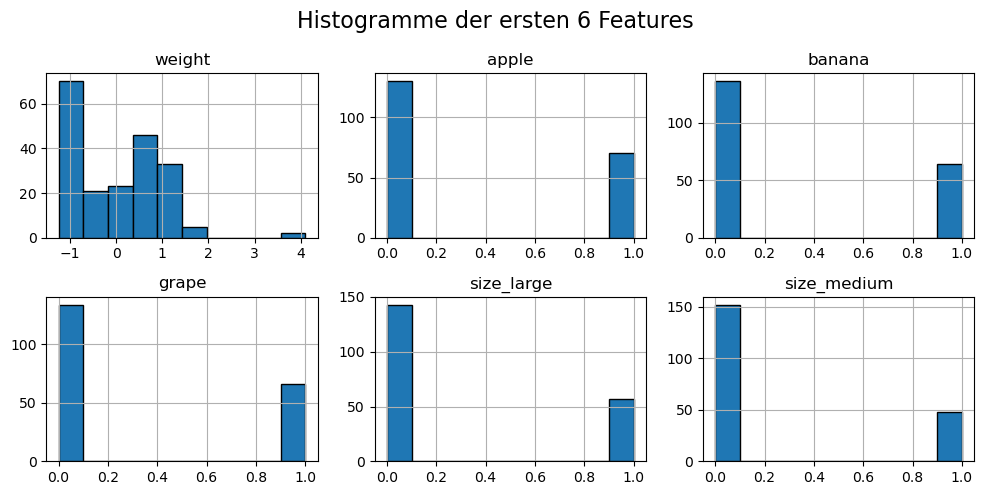

In [451]:
df_first_six_features = df.iloc[:, :6]

# Histogramme erstellen mit Layout (2 Zeilen, 3 Spalten) und Größe
df_first_six_features.hist(figsize=(10, 5), layout=(2, 3), edgecolor='black')

# anzeigen
plt.suptitle('Histogramme der ersten 6 Features', fontsize=16)
plt.tight_layout()
plt.show()

# man sieht die Verteilung der numerischen Werte,cob sie symmetrisch, schief oder binär sind.

In [452]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier

# Decision Tree (Einzelner Entscheidungsbaum) wird trainiert
# random_state=0 sorgt dafür, dass die Ergebnisse reproduzierbar sind
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train_scaled, y_train)

# 2. Gradient Boosting
# Ensemble-Verfahren: mehrere schwache Modelle (kleine Bäume) werden sequentiell trainiert
gbt = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=1.0, random_state=0)
gbt.fit(X_train_scaled, y_train)

# 3. Bagging (Bootstrap Aggregating)
# Ensemble-Verfahren: mehrere Entscheidungsbäume werden unabhängig voneinander auf zufälligen Teilmengen trainiert
bagt = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=10, random_state=0)
bagt.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0)

In [453]:
# Vorhersagen für die Testdaten mit den trainierten Modellen machen
bagt_predict = bagt.predict(X_test_scaled)
gbt_predict = gbt.predict(X_test_scaled)
dt_predict = dt.predict(X_test_scaled)
# Ausgabe der Vorhersagen des Bagging-Modells auf der Konsole
print(bagt_predict)
# Ergebnis zeigt die Vorhersagen deines Bagging-Modells für alle Testbeispiele. Es ist die Grundlage, um die Modellqualität zu messen und zu verstehen, wie gut es Früchte klassifizieren kann

['apple' 'grape' 'banana' 'banana' 'apple' 'apple' 'grape' 'apple'
 'banana' 'grape' 'banana' 'apple' 'banana' 'banana' 'grape' 'banana'
 'banana' 'banana' 'grape' 'apple' 'banana' 'apple' 'grape' 'apple'
 'apple' 'banana' 'apple' 'banana' 'apple' 'banana' 'grape' 'apple'
 'grape' 'apple' 'apple' 'banana' 'banana' 'grape' 'apple' 'apple']


In [454]:
from sklearn.metrics import accuracy_score

# Accuracy für jedes Modell berechnen
acc_bagt = accuracy_score(y_test, bagt_predict)
acc_gbt = accuracy_score(y_test, gbt_predict)
acc_dt = accuracy_score(y_test, dt_predict)

print(f"Bagging Classifier Accuracy: {acc_bagt:.3f}")
print(f"Gradient Boosting Accuracy: {acc_gbt:.3f}")
print(f"Decision Tree Accuracy: {acc_dt:.3f}")
# Ergebnis zeigt: 
# 90 % bedeutet, dass 9 von 10 Früchten korrekt klassifiziert wurden
# Dass alle drei Modelle die gleiche Accuracy haben, kann bedeuten, dass die Modelle sind ähnlich gut für diese Aufgabe.

Bagging Classifier Accuracy: 0.900
Gradient Boosting Accuracy: 0.900
Decision Tree Accuracy: 0.900


In [455]:
from sklearn.metrics import accuracy_score, classification_report

# Vorhersagen auf Testdaten
dt_pred = dt.predict(X_test_scaled)
gbt_pred = gbt.predict(X_test_scaled)
bagt_pred = bagt.predict(X_test_scaled)

# Accuracy ausgeben und berechnen für jedes Modell 
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gbt_pred))
print("Bagging Accuracy:", accuracy_score(y_test, bagt_pred))

# ausführlicher Report für Decision Tree (kannst du für die anderen auch machen)
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, dt_pred))

# Ergebnis: 
# Die Accuracy von 90% bestätigt die gute Gesamtleistung
# grape wird perfekt erkannt = Precision, Recall und F1 (1.0)
# banana hat etwas geringere Präzision (0.80), dafür sehr guten Recall (0.92).
# apple hat eine hohe Präzision (0.94), aber etwas geringeren Recall (0.83).

Decision Tree Accuracy: 0.9
Gradient Boosting Accuracy: 0.9
Bagging Accuracy: 0.9

Classification Report (Decision Tree):
              precision    recall  f1-score   support

       apple       0.94      0.83      0.88        18
      banana       0.80      0.92      0.86        13
       grape       1.00      1.00      1.00         9

    accuracy                           0.90        40
   macro avg       0.91      0.92      0.91        40
weighted avg       0.91      0.90      0.90        40



In [456]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Parameter-Raster für GridSearch definieren
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# GridSearchCV mit 5-facher Kreuzvalidierung für den Decision Tree
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Beste Parameter:", grid_search.best_params_)
print("Beste Accuracy:", grid_search.best_score_)

# Modell mit besten Parametern
best_dt = grid_search.best_estimator_

# Test Accuracy
print("Test Accuracy:", best_dt.score(X_test_scaled, y_test))
# Nach dem Tuning wurde die performance schlechter, daher habe ich sie wieder rausgenommen. 
#Es wird mit dem Grundmodell weiter gearbeitet.
# Ergebnis:
# Obwohl die Cross-Validation Accuracy mit 96,9% sehr hoch ist, liegt die Test Accuracy bei 90%.
# Das kann bedeuten, dass das getunte Modell eventuell etwas überangepasst (overfitted) auf die Trainingsdaten ist.
# Deshalb wurde entschieden, das ursprüngliche (Grund-)Modell weiter zu verwenden, um eine stabilere Generalisierung zu gewährleisten.

Beste Parameter: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Beste Accuracy: 0.96875
Test Accuracy: 0.9


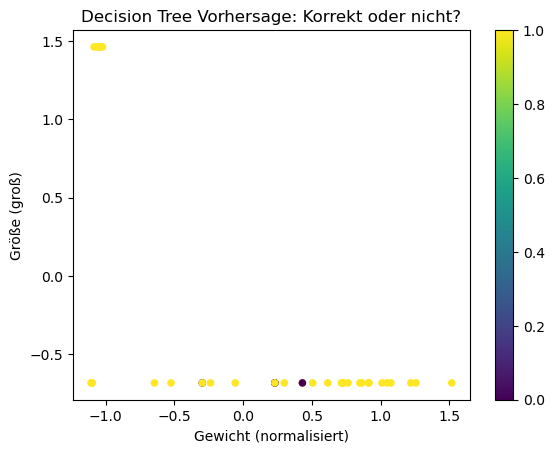

In [457]:
import matplotlib.pyplot as plt
import pandas as pd

# Vorhersagen machen
dt_prediction = dt.predict(X_test_scaled)

# DataFrame für Visualisierung bauen
df_viz = X_test_scaled.copy()
df_viz['actual_label'] = y_test
df_viz['prediction'] = dt_prediction
df_viz['correct'] = (df_viz['actual_label'] == df_viz['prediction'])

# Scatterplot erstellen: 
# x-Achse = Gewicht (normalisiert), y-Achse = Größe groß (eine One-Hot-Spalte, 0 oder 1)
# Punkte werden farblich nach 'correct' gefärbt (True/False)
scatter = df_viz.plot.scatter(
    x='weight', y='size_large', 
    c=df_viz['correct'],  # True/False für Korrektheit
    colormap='viridis',
    title='Decision Tree Vorhersage: Korrekt oder nicht?'
)
plt.xlabel('Gewicht (normalisiert)')
plt.ylabel('Größe (groß)')
plt.show()

In [458]:
# Man erkennt, dass es nur eine falsche Vorhersagen gibt (dunkle Punkte == Falsch)

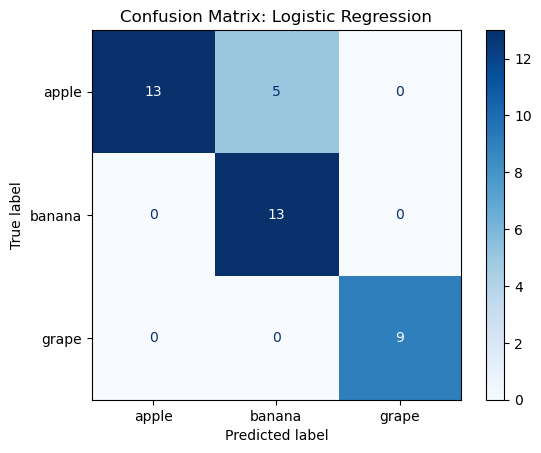

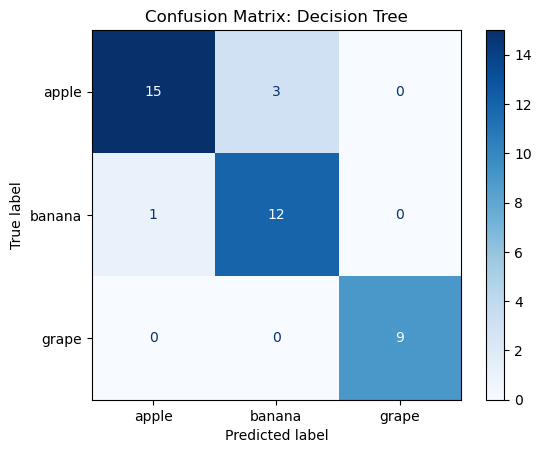

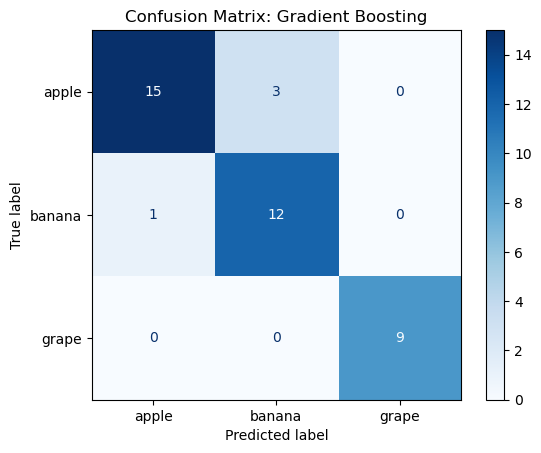

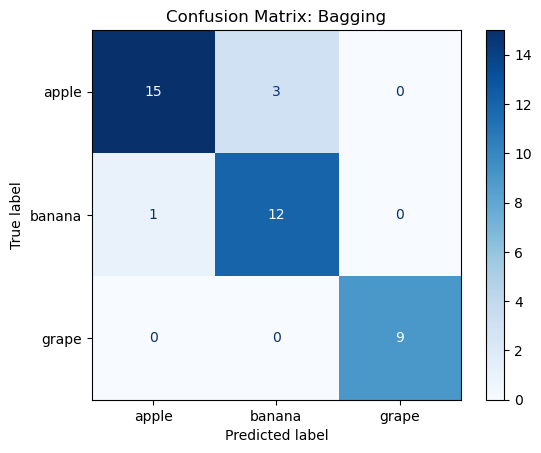

In [459]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {"Logistic Regression": lr_predict,
          "Decision Tree": dt_pred,
          "Gradient Boosting": gbt_pred,
          "Bagging": bagt_pred}
# Für jedes Modell eine Konfusionsmatrix berechnen und anzeigen
for name, preds in models.items():
    cm = confusion_matrix(y_test, preds, labels=lr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()
# Die Konfusionsmatrix gibt dir detailliertere Einblicke als nur die Accuracy

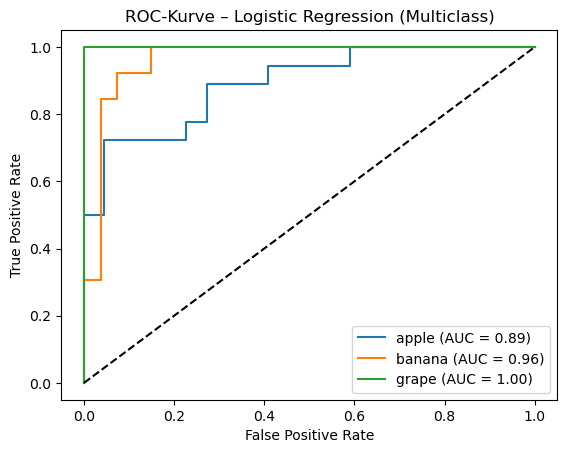

In [460]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Klassen binarisieren
y_train_bin = label_binarize(y_train, classes=['apple', 'banana', 'grape'])
y_test_bin = label_binarize(y_test, classes=['apple', 'banana', 'grape'])

# Beispiel für ROC-Kurve (Logistic Regression)
ovr = OneVsRestClassifier(LogisticRegression(max_iter=10000))
ovr.fit(X_train_scaled, y_train_bin)
y_score = ovr.decision_function(X_test_scaled)

# ROC für jede Klasse
for i, fruit in enumerate(['apple', 'banana', 'grape']):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{fruit} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Kurve – Logistic Regression (Multiclass)")
plt.legend()
plt.show()
# Visuell erkennt man hier bereits, wie gut das Modell die Frucht erkennen kann 
# Grape zu 100% 

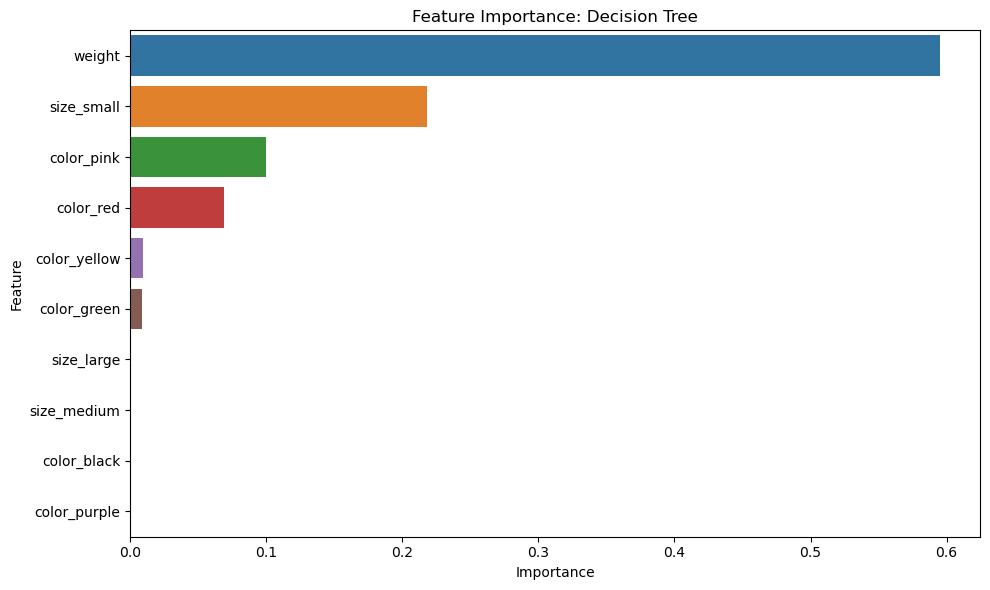

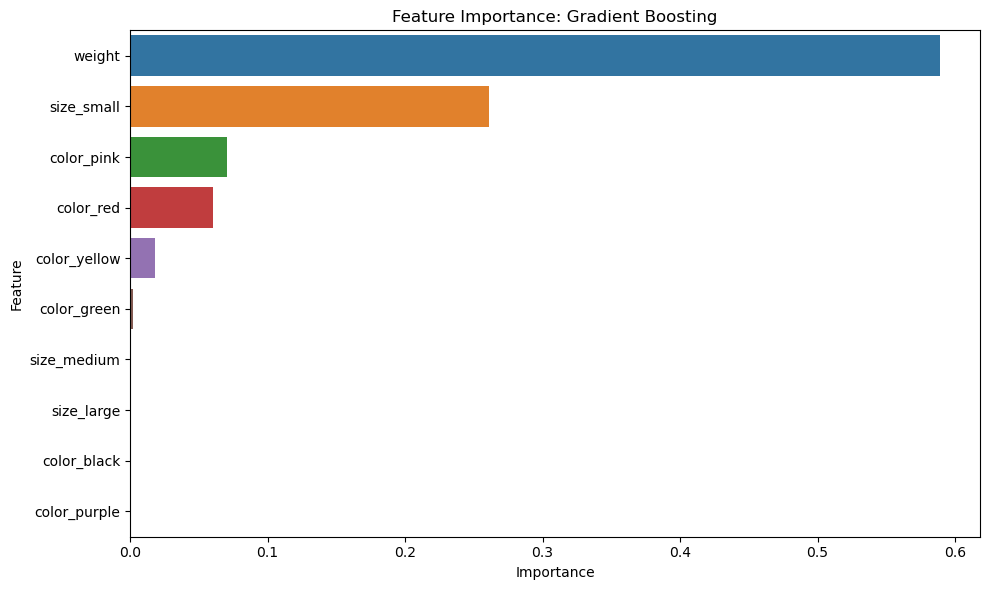

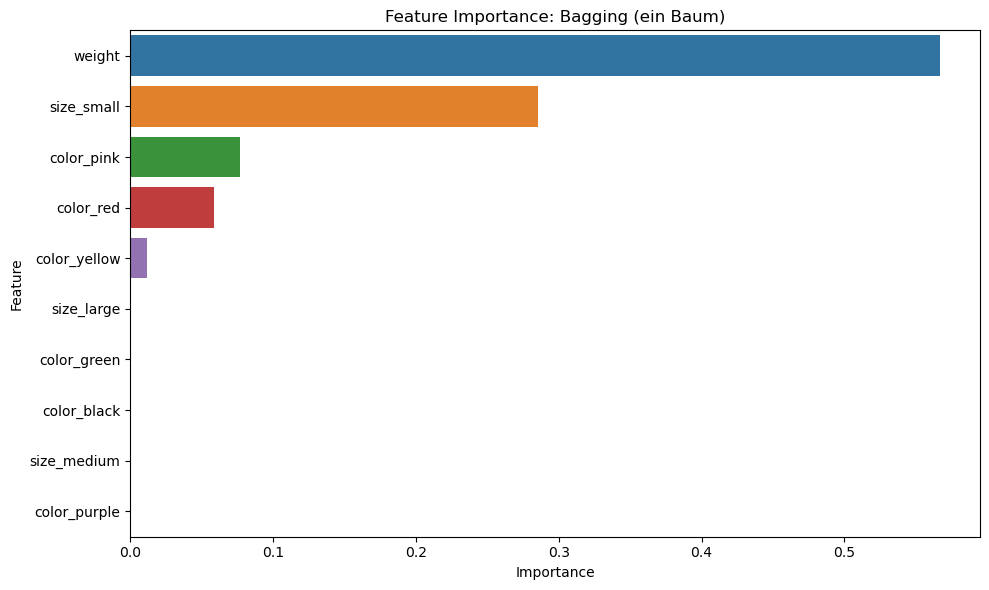

In [461]:
#  Feature Importances aus dem Modell auslesen
#  Die Werte zeigen, wie wichtig jedes Feature für die Vorhersage ist

def plot_feature_importances(model, model_name):
    importances = model.feature_importances_
    feature_names = X_train.columns
    feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_df = feat_df.sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_df, x="Importance", y="Feature")
    plt.title(f"Feature Importance: {model_name}")
    plt.tight_layout()
    plt.show()

plot_feature_importances(dt, "Decision Tree")
plot_feature_importances(gbt, "Gradient Boosting")
plot_feature_importances(bagt.estimators_[0], "Bagging (ein Baum)")
# Ergebnis: Das Gewicht ist als Feature das bedeutendste als Vorhersage 

In [ ]:
# Fazit:
# Ein Klassifikator zur Unterscheidung von Apfel, Banane und Traube wurde erfolgreich erstellt. 
# Verschiedene Modelle (Logistische Regression, Entscheidungsbaum, Gradient Boosting, Bagging) erreichten alle etwa 90 % Genauigkeit. 
# Wichtige Merkmale wie Gewicht, Farbe und Größe beeinflussen die Vorhersage maßgeblich. 
# Trotz kleinerer Fehler zeigt das Modell gute Leistung und Robustheit.